In [17]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I. Data Preprocessing

In [18]:
# Creating pandas dataframe of the Spotify dataset.
spotify_df = pd.read_csv('dataset.csv')

In [19]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Let's learn more about the data! How many samples, features, data types, etc...

In [20]:
print('Number of samples:', spotify_df.shape[0])
print('Number of features:', spotify_df.shape[1])

print(f'Category Data Types:\n{spotify_df.dtypes}')

# Creating a list with all category names.
categories = spotify_df.columns.tolist()[1:]
print("Categories:", categories)

Number of samples: 114000
Number of features: 21
Category Data Types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object
Categories: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


### Now let's look if there are any missing values!

In [21]:
missing_data = spotify_df.isna().sum()
print(missing_data)

# Saving missing values as dictionary as missing values for each category.
missing_data = missing_data.to_dict()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [22]:
# Just making sure the count is the same for each column
spotify_df.count()

Unnamed: 0          114000
track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
dtype: int64

### Looks like there is 1 missing value each in the artists, album_name, and track_name categories. Since <br> the proportion of missing data is <5% we can use Listwise Deletion to get rid of the missing values.

In [23]:
# Dropping the row with NA values in the dataframe.
spotify_df = spotify_df.dropna()

### Now check for duplicate values in the dataset.

In [24]:
# Checking for duplicates
len(spotify_df)-len(spotify_df.drop_duplicates())

0

### There aren't any exact duplicates from this analysis.

### The category, track_genre, is currently a string (object) describing what the genre of the particular song is. <br> We need to convert this to numeric values through feature encoding for our model to use later on.

In [25]:
# Checking cardinality to see what type of encoding would best fit this scenario.
print(spotify_df['track_genre'].nunique())

114


### Since this category has a high cardinality, one hot encoding would create too many new columns. <br> Let's try using frequency encoding here to convert this column.

In [26]:
freq_encoding = spotify_df['track_genre'].value_counts()
spotify_df['track_genre_freq'] = spotify_df['track_genre'].map(freq_encoding)
spotify_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1000
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1000
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1000
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1000


In [27]:
spotify_df['track_genre_freq'].unique()

array([1000,  999])

### Looks like frequency encoding might not be the best option since looks the frequency of the genres are 999 <br> or 1000 which loses much of the uniqueness and information we are looking for from this category. Another <br> good option for encoding when there is high cardinality is Target/Mean Encoding, let's try that!

In [28]:
genre_popularity_map = spotify_df.groupby('track_genre')['popularity'].mean()
spotify_df['track_genre_target_enc'] = spotify_df['track_genre'].map(genre_popularity_map)
print('No. Unique Values: ', spotify_df['track_genre_target_enc'].nunique())
spotify_df

No. Unique Values:  113


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,track_genre_target_enc
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1000,42.483
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1000,42.483
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1000,42.483
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1000,42.483
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1000,42.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,1000,41.873
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,1000,41.873
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,1000,41.873
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,1000,41.873


## II. Exploratory Data Analysis

### II.a. Correlations
We will start our analysis by determining how each feature is related to each other. To do this, we will create a plot of the correlations between each numerical feature. 

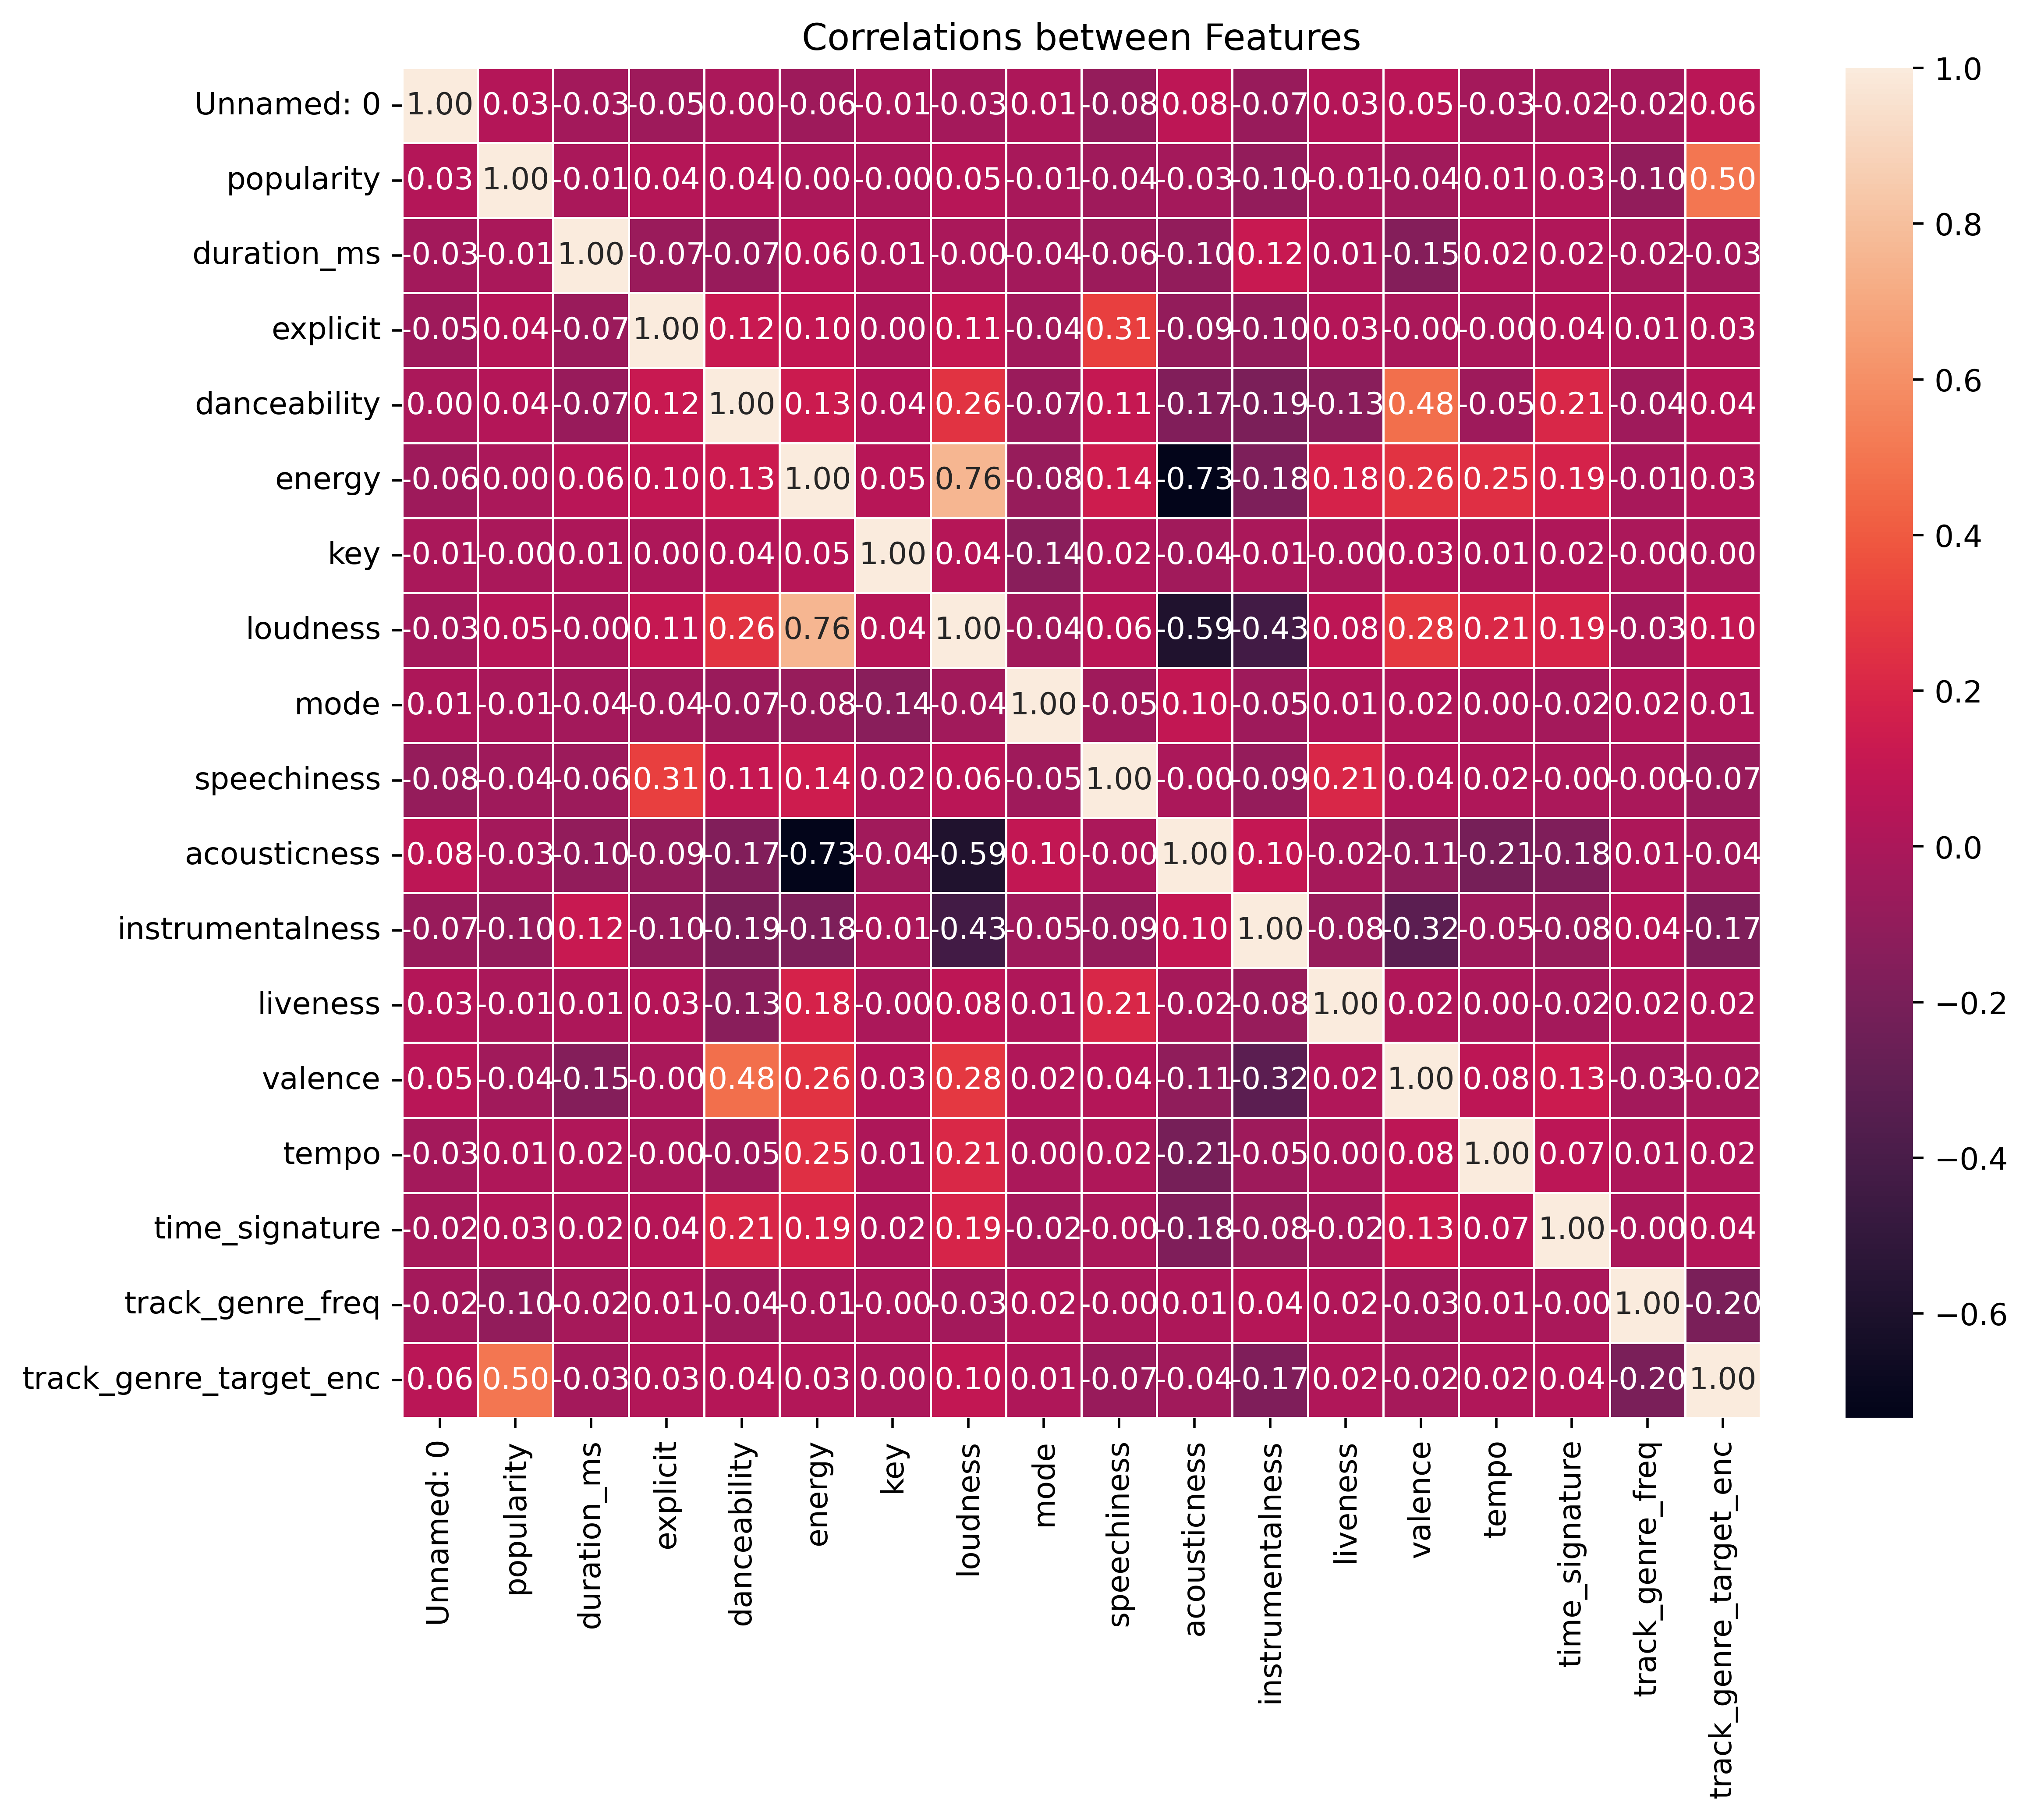

In [78]:
corr = spotify_df.corr(method = 'pearson', numeric_only= True)
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

We can see from the above plot that some features are more correlated, such as acousticness and energy, as well as acousticness and loudness. However, most features are not highly correlated. This is easier to see when we plot the absolute value of the correlation.

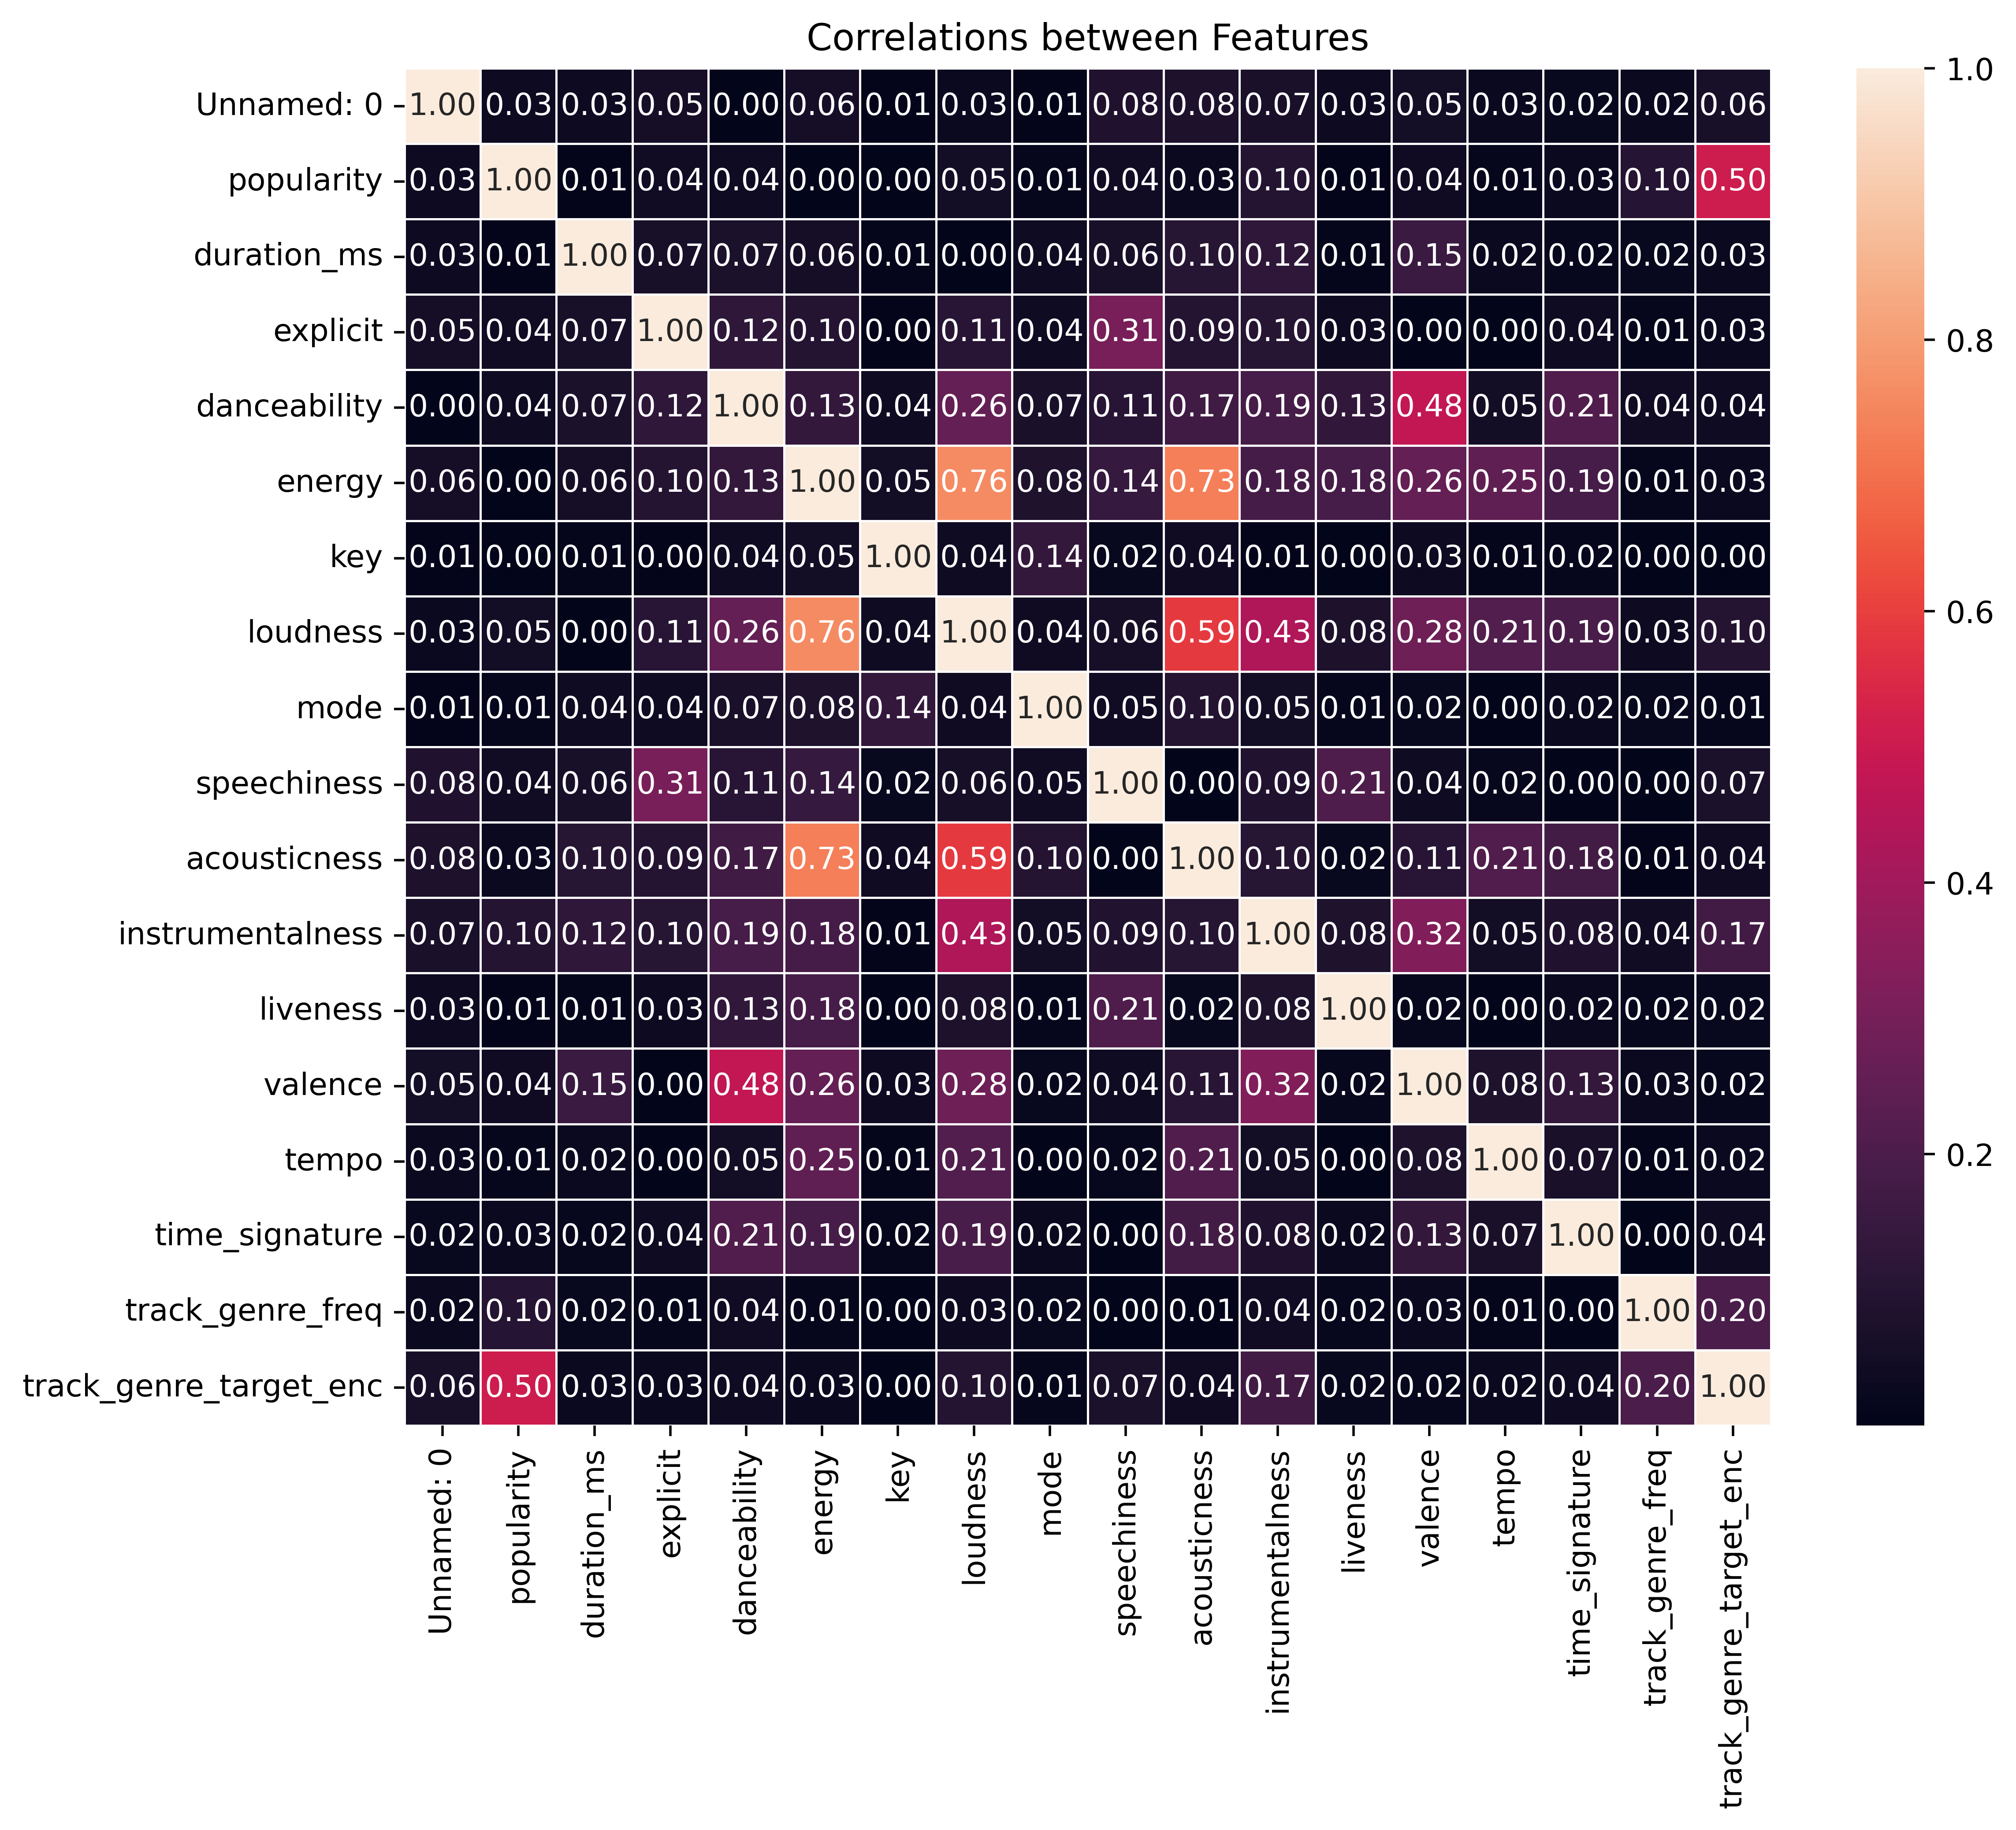

In [114]:
plt.figure(figsize=(10,8), dpi =500)
plt.title("Correlations between Features")
sns.heatmap(corr.abs(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

Most of the pairs of features have absolute correlation less than 0.1. To expand on this, let's find out which features are most correlated to which.

In [108]:
pairs = list()
for column in corr.columns:
    related_feature = corr[column].abs().sort_values(ascending= False).iloc[[1]].index.array[0]
    pairs.append([column, related_feature])
    print(column, " is most correlated with ", related_feature)

Unnamed: 0  is most correlated with  speechiness
popularity  is most correlated with  track_genre_target_enc
duration_ms  is most correlated with  valence
explicit  is most correlated with  speechiness
danceability  is most correlated with  valence
energy  is most correlated with  loudness
key  is most correlated with  mode
loudness  is most correlated with  energy
mode  is most correlated with  key
speechiness  is most correlated with  explicit
acousticness  is most correlated with  energy
instrumentalness  is most correlated with  loudness
liveness  is most correlated with  speechiness
valence  is most correlated with  danceability
tempo  is most correlated with  energy
time_signature  is most correlated with  danceability
track_genre_freq  is most correlated with  track_genre_target_enc
track_genre_target_enc  is most correlated with  popularity


Some interesting points come from this: 
- the duration of a song tends to be longer when the valence ("musical positiveness") is lower,
- in contrast the danceability tends to be higher when the valence is higher,
- energy (intensity) is highly correlated with loudness and acousticness,
- the tempo tends to be faster when the energy is higher.

Above all however, is that popularity is not highly correlated with any feature except for potentially track genre.

## III. Summary Statistics